# 1-Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# 2-Get the data

In [2]:
path1 = 'obtrain-ml.csv'

df = pd.read_csv(path1, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,0.345081,0.746197,-1.090600,-1.080283,-0.271744,0.071893,-0.750719,1.320688,0.695390,1.163406,...,0.432794,-0.343324,-1.237080,0.392683,-1.937201,1.273496,0.471206,0.088425,-0.754906,-1.0
1,-1.238198,-0.990755,0.471342,-0.101829,-1.129983,0.341522,1.189618,-0.720331,0.104180,-1.092291,...,-1.290025,0.139505,0.117134,-0.186936,0.408618,0.237257,-1.110670,-0.645378,1.779565,-1.0
2,-0.008384,0.834482,0.726280,-1.889651,0.927735,-0.167712,0.570338,0.808293,-1.187723,-0.093282,...,-1.068939,-1.592181,-0.709196,0.754166,-0.060812,-0.646838,-0.774647,0.161045,-1.289014,-1.0
3,-0.082521,0.900501,1.673648,0.935160,1.558300,-0.406216,-0.735869,0.540115,-0.494145,-0.496822,...,0.453064,0.929381,1.205144,-1.941207,0.246593,0.710245,1.027464,0.483457,1.000004,1.0
4,-2.134288,-0.561238,-1.293037,-0.703646,1.918425,-1.160573,-0.106683,0.546631,-0.006137,0.632034,...,-2.686108,0.544527,0.886340,-0.885839,0.574833,-1.298381,0.814288,-0.834902,0.195764,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 560 entries, 0 to 559
dtypes: float64(560)
memory usage: 8.5 MB


In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.00000
mean,-4.533041e-16,2.373102e-16,3.731460e-16,5.121459e-16,-2.249312e-16,-5.644374e-16,-1.430522e-15,1.479372e-16,1.797035e-16,-3.349959e-16,...,-9.074824e-16,4.851675e-17,1.095790e-15,6.250556e-15,3.201051e-16,5.143663e-15,7.799317e-18,-9.864332e-16,-9.859336e-16,0.00000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.00025
min,-3.806609e+00,-3.249674e+00,-3.340611e+00,-3.298440e+00,-3.228107e+00,-3.259287e+00,-3.237158e+00,-3.518765e+00,-3.117747e+00,-3.669559e+00,...,-4.123012e+00,-3.089802e+00,-3.754656e+00,-3.578335e+00,-3.839075e+00,-3.471544e+00,-3.735818e+00,-3.734729e+00,-4.071743e+00,-1.00000
25%,-6.518120e-01,-8.620804e-01,-6.931272e-01,-6.918625e-01,-6.489926e-01,-6.539326e-01,-6.638078e-01,-7.164303e-01,-6.833506e-01,-6.996555e-01,...,-6.071954e-01,-6.765307e-01,-6.444703e-01,-6.529039e-01,-6.870561e-01,-6.731509e-01,-6.744861e-01,-6.744321e-01,-6.624165e-01,-1.00000
50%,-1.110822e-02,-7.019288e-03,-2.689188e-04,-2.197787e-02,-2.821030e-03,-1.339113e-02,2.389254e-02,3.500354e-02,1.872041e-02,-2.242355e-03,...,2.640873e-02,-1.159443e-02,3.245307e-02,-5.806578e-02,-5.655842e-02,9.680798e-03,3.983293e-02,1.050333e-02,9.302599e-03,0.00000
75%,6.537779e-01,8.554428e-01,7.047071e-01,6.453907e-01,6.784400e-01,6.430344e-01,6.495657e-01,5.598357e-01,6.493064e-01,6.732397e-01,...,6.933908e-01,6.625549e-01,6.595602e-01,6.322097e-01,7.105999e-01,6.671100e-01,6.825393e-01,6.653655e-01,6.653531e-01,1.00000
max,2.965983e+00,3.193342e+00,2.940053e+00,2.732206e+00,3.611380e+00,3.427170e+00,3.158721e+00,3.343066e+00,3.233024e+00,3.241649e+00,...,3.287154e+00,3.635809e+00,3.316442e+00,3.455745e+00,4.175236e+00,3.360887e+00,3.527163e+00,4.544100e+00,3.773016e+00,1.00000


## Train-Test Split
The data is split into train and test datasets in a stratified fashion using the target label. The training dataset includes 75% of the original dataset.

In [6]:
from sklearn.model_selection import train_test_split
df[559]=df[559].replace(-1, 0) #replace -1 with 0 for binary classification (0,1)
y = df[559]
X = df.drop(559,axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 15) 

## Feature Engineering
The number of missing values in each column of the training and test datasets are as follows:

In [7]:
print ('Is there any null value in the training dataset?   %s' % (X_train.isnull().any()).any())
print ('Is there any null value in the test dataset?       %s' % (X_test.isnull().any()).any())

Is there any null value in the training dataset?   False
Is there any null value in the test dataset?       False


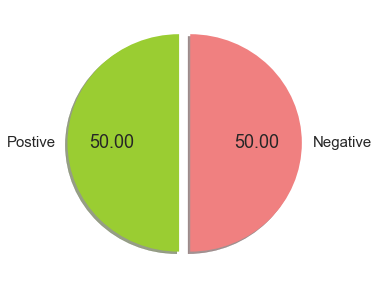

In [8]:
sns.set_context('notebook',font_scale=1.5)
labels =['Postive','Negative']
colors = ['yellowgreen', 'lightcoral']
explode = (0, 0.1)
plt.figure(figsize=(5,5))
plt.pie(y_train.value_counts(),labels=labels,colors=colors,explode=explode, shadow=True, startangle=90, autopct='%.2f');

In [9]:
#count the numbers of int64, float64, bool or object/string features
train = X
int_features = train.select_dtypes(include = ['int64']).columns.values
float_features = train.select_dtypes(include = ['float64']).columns.values
bool_features= train.select_dtypes(include = ['bool']).columns.values
categorical_features = train.select_dtypes(include = ['object']).columns.values
print('int_features:', int_features) #, 'count of int_features:'count(int_features)
print('float_features:', float_features)
print('bool_features:', bool_features)
print('categorical_features:', categorical_features)

int_features: []
float_features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 2

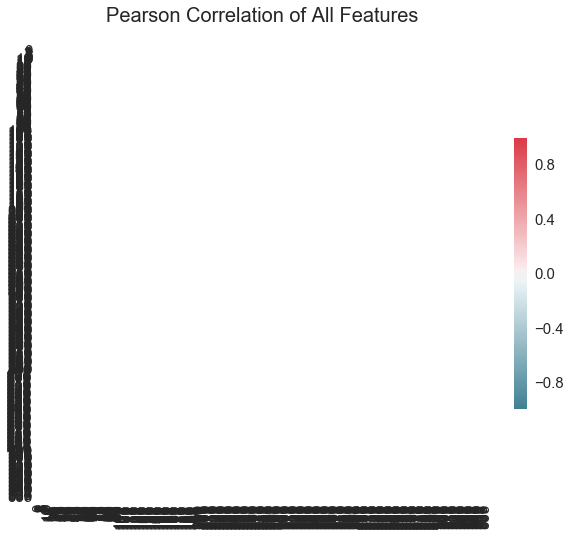

In [10]:
corr = train.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


plt.title('Pearson Correlation of All Features', y=1.05, size=20)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [11]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

# Create an XGBoost-compatible metric from Gini

def gini_coefficient(preds,dtrain):
    y = dtrain.get_label()
    return 'gini', -gini_normalized(y,preds)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import precision_score, accuracy_score, f1_score, roc_auc_score
import xgboost as xgb
#cross_validation.py:41: DeprecationWarning is due to the xgboost package

/Anaconda/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# try simple models 101 class_weight='balanced' is satisfied
clfs = {'LogisticRegression':LogisticRegression(),
        'SVC': SVC(),
        'KNeighborsClassifier': KNeighborsClassifier(n_neighbors = 2),
        'GaussianNB': GaussianNB(), 
        'Perceptron': Perceptron(max_iter=1000), 
        'LinearSVC': LinearSVC(), 
        'SGDClassifier': SGDClassifier(max_iter=1000), 
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
        'XGBoostClassifier': xgb.XGBClassifier(max_depth=5, n_estimators=500, learning_rate=0.05),
        'AdaBoost': AdaBoostClassifier(), 
        'Extra Tree': ExtraTreesClassifier()
       }

res2 = []
for name, clf in clfs.items():
    clf.fit(X_train,y_train)
    ypred = clf.predict(X_test)
    gini_ = gini_normalized(y_test,ypred)
    precision_ = precision_score(ypred, y_test)
    accuracy_ = accuracy_score(ypred,y_test)
    f1_ = f1_score(ypred,y_test)
    res2.append([name, gini_, precision_, accuracy_, f1_])

res2_score = pd.DataFrame(np.array(res2).reshape(12,5), columns = ['clf', 'gini', 'precision', 'accuracy', 'f1'])
res2_score['f1'] = res2_score['f1'].astype(float)
res2_score.sort_values('f1')

,clf,gini,precision,accuracy,f1
2,KNeighborsClassifier,0.069344,0.308,0.544,0.403141
11,Extra Tree,0.077184,0.46,0.554,0.507726
6,SGDClassifier,0.051136,0.508,0.54,0.524793
5,LinearSVC,0.09472,0.544,0.562,0.553971
0,LogisticRegression,0.11504,0.548,0.572,0.561475
4,Perceptron,0.122944,0.548,0.576,0.563786
3,GaussianNB,0.150816,0.568,0.588,0.579592
10,AdaBoost,0.182272,0.592,0.604,0.599190
1,SVC,0.176448,0.604,0.604,0.604000
8,RandomForestClassifier,0.342592,0.636,0.68,0.665272


In [14]:
xgb2=xgb.XGBClassifier(max_depth=6, n_estimators=1500, learning_rate=0.01, nthread=4)

xgb2.fit(X_train,y_train)
ypred = xgb2.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
df2 = pd.DataFrame([['xgb2', gini_, precision_, accuracy_, f1_]], columns=['clf', 'gini', 'precision', 'accuracy', 'f1'])
res2_score = res2_score.append(df2, ignore_index=True)
res2_score.sort_values('f1')

Extra Tree classifier: gini = 0.6500, precision = 0.8160, accuracy = 0.8160, f1 score = 0.8160


,clf,gini,precision,accuracy,f1
2,KNeighborsClassifier,0.069344,0.308,0.544,0.403141
11,Extra Tree,0.077184,0.46,0.554,0.507726
6,SGDClassifier,0.051136,0.508,0.54,0.524793
5,LinearSVC,0.09472,0.544,0.562,0.553971
0,LogisticRegression,0.11504,0.548,0.572,0.561475
4,Perceptron,0.122944,0.548,0.576,0.563786
3,GaussianNB,0.150816,0.568,0.588,0.579592
10,AdaBoost,0.182272,0.592,0.604,0.599190
1,SVC,0.176448,0.604,0.604,0.604000
8,RandomForestClassifier,0.342592,0.636,0.68,0.665272


XGB parameters: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [34]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score, StratifiedKFold, StratifiedShuffleSplit

def XGB_CV(
          max_depth,
          gamma,
          min_child_weight,
          max_delta_step,
          subsample,
          colsample_bytree
         ):

    global AUCbest
    global ITERbest
#
# Define all XGboost parameters
#

    paramt = {
              'booster' : 'gbtree',
              'max_depth' : int(max_depth),
              'gamma' : gamma,
              'learning_rate' : 0.05,
              'objective' : 'binary:logistic',
              'nthread' : 4,
              'silent' : True,
              'eval_metric': 'auc',
              'subsample' : max(min(subsample, 1), 0),
              'colsample_bytree' : max(min(colsample_bytree, 1), 0),
              'min_child_weight' : min_child_weight,
              'max_delta_step' : int(max_delta_step),
              'seed' : 42
              }

    folds = 5
    cv_score = 0

    print("\n Search parameters (%d-fold validation):\n %s" % (folds, paramt), file=log_file )
    log_file.flush()

    xgbc = xgb.cv(
                    paramt,
                    dtrain,
                    num_boost_round = 2000,
                    stratified = True,
                    nfold = folds,
#                    verbose_eval = 10,
                    early_stopping_rounds = 100,
                    metrics = 'auc',
                    show_stdv = True
               )
    
    val_score = xgbc['test-auc-mean'].iloc[-1]
    train_score = xgbc['train-auc-mean'].iloc[-1]
    print(' Stopped after %d iterations with train-auc = %f val-auc = %f ( diff = %f ) train-gini = %f val-gini = %f' % ( len(xgbc), train_score, val_score, (train_score - val_score), (train_score*2-1),
(val_score*2-1)))
    if ( val_score > AUCbest ):
        AUCbest = val_score
        ITERbest = len(xgbc)

    return (val_score*2) - 1

In [35]:
dtrain = xgb.DMatrix(X, y)

In [36]:
XGB_BO = BayesianOptimization(XGB_CV, {
                                     'max_depth': (3, 12),
                                     'gamma': (0.001, 20.0),
                                     'min_child_weight': (0, 20),
                                     'max_delta_step': (0, 10),
                                     'subsample': (0.4, 1.0),
                                     'colsample_bytree' :(0.4, 1.0)
                                    })

In [37]:
XGB_BO.explore({
              'max_depth':            [3, 8, 3, 8, 8, 3, 8, 3],
              'gamma':                [0.5, 8, 0.2, 9, 0.5, 8, 0.2, 9],
              'min_child_weight':     [0.2, 0.2, 0.2, 0.2, 12, 12, 12, 12],
              'max_delta_step':       [1, 2, 2, 1, 2, 1, 1, 2],
              'subsample':            [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              'colsample_bytree':     [0.6, 0.8, 0.6, 0.8, 0.6, 0.8, 0.6, 0.8],
              })

In [39]:
# %%time
# # Define the log file. If you repeat this run, new output will be added to it
# import warnings

# log_file = open('Opleai-AUC-5fold-XGB-run-01-v1-full.log', 'a')
# AUCbest = -1.
# ITERbest = 0

# print('-'*30)
# print('-'*30, file=log_file)
# log_file.flush()

# with warnings.catch_warnings():
#     warnings.filterwarnings('ignore')
#     XGB_BO.maximize(init_points=10, n_iter=25, acq='ucb', kappa=10)
# # XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=10)
# # XGB_BO.maximize(init_points=10, n_iter=50, acq='ucb', kappa=1)

------------------------------
Initialization
----------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_delta_step |   max_depth |   min_child_weight |   subsample | 
 Stopped after 37 iterations with train-auc = 0.899687 val-auc = 0.798205 ( diff = 0.101482 ) train-gini = 0.799374 val-gini = 0.596410
    1 | 00m17s |    0.59641 |             0.6000 |    0.5000 |           1.0000 |      3.0000 |             0.2000 |      0.6000 | 
 Stopped after 32 iterations with train-auc = 0.984375 val-auc = 0.894720 ( diff = 0.089655 ) train-gini = 0.968751 val-gini = 0.789440
    2 | 01m04s |    0.78944 |             0.8000 |    8.0000 |           2.0000 |      8.0000 |             0.2000 |      0.8000 | 
 Stopped after 37 iterations with train-auc = 0.906475 val-auc = 0.793060 ( diff = 0.113415 ) train-gini = 0.812951 val-gini = 0.586120
    3 | 00m17s |   

 Stopped after 29 iterations with train-auc = 0.837072 val-auc = 0.800070 ( diff = 0.037002 ) train-gini = 0.674144 val-gini = 0.600140
   29 | 00m29s |    0.60014 |             0.4000 |   20.0000 |          10.0000 |      3.0000 |            20.0000 |      1.0000 | 
 Stopped after 21 iterations with train-auc = 0.829606 val-auc = 0.793770 ( diff = 0.035836 ) train-gini = 0.659212 val-gini = 0.587540
   30 | 00m30s |    0.58754 |             1.0000 |   20.0000 |           0.0000 |      3.0000 |            20.0000 |      1.0000 | 
 Stopped after 673 iterations with train-auc = 1.000000 val-auc = 0.888175 ( diff = 0.111825 ) train-gini = 1.000000 val-gini = 0.776350
   31 | 12m24s |    0.77635 |             1.0000 |    0.0010 |          10.0000 |     12.0000 |             0.0000 |      1.0000 | 
 Stopped after 24 iterations with train-auc = 0.881325 val-auc = 0.846532 ( diff = 0.034793 ) train-gini = 0.762651 val-gini = 0.693065
   32 | 01m10s |    0.69306 |             1.0000 |   20.000

In [40]:
print('Final Results')
print('Maximum XGBOOST value: %f' % XGB_BO.res['max']['max_val'])
print('Best XGBOOST parameters: ', XGB_BO.res['max']['max_params'])

Final Results
Maximum XGBOOST value: 0.789440
Best XGBOOST parameters:  {'max_depth': 8.0, 'gamma': 8.0, 'min_child_weight': 0.20000000000000001, 'max_delta_step': 2.0, 'subsample': 0.80000000000000004, 'colsample_bytree': 0.80000000000000004}


## Hyperparameters tuning

In [15]:
# 5 fold cross validation is more accurate than using a single validation set
path1 = 'obtrain-ml.csv'
df = pd.read_csv(path1, header=None)
y = df[559]
X = df.drop(559,axis=1)
y = y.replace([-1.0], 0)

# set the seed of random number generator, which is useful for creating simulations 
# or random objects that can be reproduced.
import random
SEED=3
random.seed(SEED)
np.random.seed(SEED)

cv_folds = 5
early_stopping_rounds = 400
model=xgb.XGBClassifier(seed = SEED)
xgb_param = model.get_xgb_params()
model.set_params(learning_rate=0.05, max_depth=8, gamma=8, min_child_weight=0.2, max_delta_step=2, 
                 subsample=0.8, colsample_bytree=0.8)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=8, learning_rate=0.05, max_delta_step=2, max_depth=8,
       min_child_weight=0.2, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=3, silent=True, subsample=0.8)

In [16]:
xgb10=model
xgb10.fit(X_train,y_train)
ypred = xgb10.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
# print('%s classifier: gini = %.4f, precision = %.4f, accuracy = %.4f, f1 score = %.4f' 
#       %(name, gini_, precision_, accuracy_, f1_))
df10 = pd.DataFrame([['BayesOPtiTuned xgb', gini_, precision_, accuracy_, f1_]], columns=['clf', 'gini', 'precision', 'accuracy', 'f1'])
res2_score = res2_score.append(df10, ignore_index=True)
res2_score.sort_values('f1')

,clf,gini,precision,accuracy,f1
2,KNeighborsClassifier,0.069344,0.308,0.544,0.403141
11,Extra Tree,0.077184,0.46,0.554,0.507726
6,SGDClassifier,0.051136,0.508,0.54,0.524793
5,LinearSVC,0.09472,0.544,0.562,0.553971
0,LogisticRegression,0.11504,0.548,0.572,0.561475
4,Perceptron,0.122944,0.548,0.576,0.563786
3,GaussianNB,0.150816,0.568,0.588,0.579592
10,AdaBoost,0.182272,0.592,0.604,0.599190
1,SVC,0.176448,0.604,0.604,0.604000
8,RandomForestClassifier,0.342592,0.636,0.68,0.665272


In [17]:
xgb11=xgb.XGBClassifier(n_estimators=21, max_depth = 5, min_child_weight = 4, 
                        gamma = 0.5, colsample_bytree=0.6, subsample=0.9, reg_lambda=0.017, 
                        reg_alpha=0.007, learning_rate=0.0445, silent=1, nthread = 4)
xgb11.fit(X_train,y_train)
ypred = xgb11.predict(X_test)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
df11 = pd.DataFrame([['Tuned xgb', gini_, precision_, accuracy_, f1_]], columns=['clf', 'gini', 'precision', 'accuracy', 'f1'])
res2_score = res2_score.append(df11, ignore_index=True)
res2_score.sort_values('f1')

,clf,gini,precision,accuracy,f1
2,KNeighborsClassifier,0.069344,0.308,0.544,0.403141
11,Extra Tree,0.077184,0.46,0.554,0.507726
6,SGDClassifier,0.051136,0.508,0.54,0.524793
5,LinearSVC,0.09472,0.544,0.562,0.553971
0,LogisticRegression,0.11504,0.548,0.572,0.561475
4,Perceptron,0.122944,0.548,0.576,0.563786
3,GaussianNB,0.150816,0.568,0.588,0.579592
10,AdaBoost,0.182272,0.592,0.604,0.599190
1,SVC,0.176448,0.604,0.604,0.604000
8,RandomForestClassifier,0.342592,0.636,0.68,0.665272


array([ 99.6,  99.7,  99.8,  99.9, 100. ])

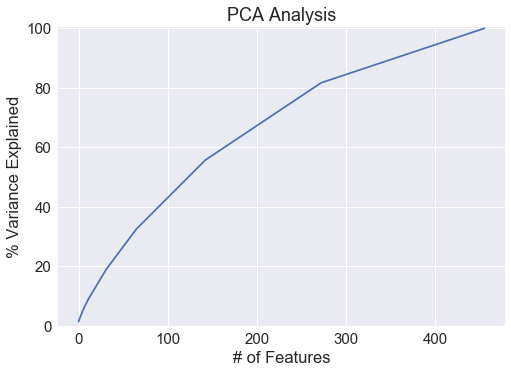

In [18]:
# find the n_compoents
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 456)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')

plt.plot(var)
var[-5:]

In [20]:
#tuned xgbclf on data after pca 
n_components = 456
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
xgb12=xgb.XGBClassifier(n_estimators=21, max_depth = 5, min_child_weight = 4, 
                        gamma = 0.5, colsample_bytree=0.6, subsample=0.9, reg_lambda=0.017, 
                        reg_alpha=0.007, learning_rate=0.0445, silent=1, nthread = 4)
xgb12.fit(X_train_pca,y_train)
ypred = xgb12.predict(X_test_pca)
gini_ = gini_normalized(y_test,ypred)
precision_ = precision_score(ypred, y_test)
accuracy_ = accuracy_score(ypred,y_test)
f1_ = f1_score(ypred,y_test)
df12 = pd.DataFrame([['Tuned xgb_pca', gini_, precision_, accuracy_, f1_]], columns=['clf', 'gini', 'precision', 'accuracy', 'f1'])
res2_score = res2_score.append(df12, ignore_index=True)
print("All the classifiers used in this problem:", '\n',res2_score.clf)
res2_score.sort_values('f1')

All the classifiers used in this problem: 
 0         LogisticRegression
1                        SVC
2       KNeighborsClassifier
3                 GaussianNB
4                 Perceptron
5                  LinearSVC
6              SGDClassifier
7     DecisionTreeClassifier
8     RandomForestClassifier
9          XGBoostClassifier
10                  AdaBoost
11                Extra Tree
12                      xgb2
13        BayesOPtiTuned xgb
14                 Tuned xgb
15             Tuned xgb_pca
Name: clf, dtype: object


,clf,gini,precision,accuracy,f1
2,KNeighborsClassifier,0.069344,0.308,0.544,0.403141
11,Extra Tree,0.077184,0.46,0.554,0.507726
6,SGDClassifier,0.051136,0.508,0.54,0.524793
5,LinearSVC,0.09472,0.544,0.562,0.553971
0,LogisticRegression,0.11504,0.548,0.572,0.561475
4,Perceptron,0.122944,0.548,0.576,0.563786
15,Tuned xgb_pca,0.222624,0.508,0.628,0.577273
3,GaussianNB,0.150816,0.568,0.588,0.579592
10,AdaBoost,0.182272,0.592,0.604,0.599190
1,SVC,0.176448,0.604,0.604,0.604000
